In [23]:
import json
from os import path
import matplotlib.pyplot as plt 

In [24]:
from transformers import BartTokenizerFast

tokenizer = BartTokenizerFast.from_pretrained('sshleifer/distilbart-xsum-12-6')

In [25]:
data_dir = "/home/shtoshni/Research/rap_nlp/data/summarization/xsum_proc"
# split_file = path.join(data_dir, "validation.jsonlines")
split_file = path.join(data_dir, "xsum_train_0_max_5000.jsonlines")

In [26]:
data = []
instance_len = []
with open(split_file) as f:
    for line in f:
        instance = json.loads(line.strip())
        data.append(instance)
        doc_ids = []
        for sentence in instance["sentences"]:
            doc_ids.extend(sentence)
        instance_len.append(len(doc_ids))

(array([4.998e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+01, 3.52270e+03, 7.03540e+03, 1.05481e+04, 1.40608e+04,
        1.75735e+04, 2.10862e+04, 2.45989e+04, 2.81116e+04, 3.16243e+04,
        3.51370e+04]),
 <BarContainer object of 10 artists>)

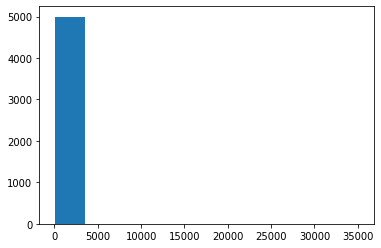

In [27]:
plt.hist(instance_len)

In [28]:
import numpy as np
np_array = np.array(instance_len)
print(np.mean(np_array))
print(np.max(np_array))
print(np.median(np_array))
print(np.min(np_array))


498.4476
35137
394.0
10


In [33]:
instance = data[0]
print(instance["part_lens"])
doc_ids = []
for sentence in instance["sentences"]:
    doc_ids.extend(sentence)
    
print(tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(doc_ids[:instance["part_lens"][0]])))

[41, 781]
 New Welsh Rugby Union chairman Gareth Davies believes a joint £3.3m WRU-regions fund should be used to retain home-based talent such as Liam Williams, not bring back exiled stars.


In [34]:
print(tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(doc_ids[instance["part_lens"][0]:])))

 Recent reports have linked some France-based players with returns to Wales. "I've always felt - and this is with my rugby hat on now; this is not region or WRU - I'd rather spend that money on keeping players in Wales," said Davies. The WRU provides £2m to the fund and £1.3m comes from the regions. Former Wales and British and Irish Lions fly-half Davies became WRU chairman on Tuesday 21 October, succeeding deposed David Pickering following governing body elections. He is now serving a notice period to leave his role as Newport Gwent Dragons chief executive after being voted on to the WRU board in September. Davies was among the leading figures among Dragons, Ospreys, Scarlets and Cardiff Blues officials who were embroiled in a protracted dispute with the WRU that ended in a £60m deal in August this year. In the wake of that deal being done, Davies said the £3.3m should be spent on ensuring current Wales-based stars remain there. In recent weeks, Racing Metro flanker Dan Lydiate was l

In [40]:
instance["coref_clusters"]

[[[[0, 6], ' New Welsh Rugby Union chairman Gareth Davies'],
  [[56, 56], 'I'],
  [[65, 65], ' my'],
  [[79, 79], ' I'],
  [[92, 92], ' Davies'],
  [[146, 146], ' He'],
  [[155, 155], ' his'],
  [[176, 176], ' Davies'],
  [[228, 228], ' Davies'],
  [[341, 341], ' Davies'],
  [[346, 346], ' his'],
  [[474, 474], ' I'],
  [[483, 483], ' my'],
  [[497, 497], ' I'],
  [[594, 594], ' I'],
  [[687, 692], ' British and Irish Lions centre Roberts'],
  [[695, 695], ' he'],
  [[699, 699], ' his'],
  [[704, 704], ' He'],
  [[716, 716], ' Roberts'],
  [[741, 742], ' Centre Roberts']],
 [[[1, 3], ' Welsh Rugby Union'],
  [[15, 16], ' WRU'],
  [[76, 77], ' WRU'],
  [[92, 96], ' Davies. The WRU'],
  [[94, 96], ' The WRU'],
  [[127, 128], ' WRU'],
  [[170, 171], ' WRU'],
  [[203, 205], ' the WRU'],
  [[389, 390], ' The union']],
 [[[32, 33], ' Liam Williams'], [[538, 541], ' Justin Tipuric']],
 [[[53, 53], ' Wales'],
  [[89, 89], ' Wales'],
  [[116, 116], ' Wales'],
  [[242, 242], ' Wales'],
  [[266, 